In [12]:
import pandas as pd
import numpy as np
import matplotlib.axes as axis
import matplotlib.pyplot as plt

Let's check what the number of anime that have been loaded in the main csv file:


In [30]:
fullDF = pd.read_csv('anime_data.csv')
print(fullDF.info())    #Gives the total sets of data and the data type of each column
null_count = fullDF.isnull().sum()
print(null_count)  #Count the number of nulls in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3205 non-null   int64  
 1   title         3205 non-null   object 
 2   startDate     3205 non-null   object 
 3   popularity    3205 non-null   int64  
 4   favourites    3205 non-null   int64  
 5   tags          3205 non-null   object 
 6   genres        3205 non-null   object 
 7   averageScore  3205 non-null   int64  
 8   episodes      3205 non-null   int64  
 9   duration      3203 non-null   float64
 10  description   3202 non-null   object 
 11  studios       3205 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 300.6+ KB
None
id              0
title           0
startDate       0
popularity      0
favourites      0
tags            0
genres          0
averageScore    0
episodes        0
duration        2
description     3
studios         0
dtype:

Now let's do the same but for the other dataframe


<h2>Reformatting the Data </h2></br>
<p>Let's start by removing the NaN values in the dataset. </p>

In [3]:
fullDF = fullDF.dropna()
print(fullDF.info()) 
#I want to view all the null values anime

#print(df_nan)  #Count the number of nulls in our dataset


<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3201 non-null   int64  
 1   title         3201 non-null   object 
 2   startDate     3201 non-null   object 
 3   popularity    3201 non-null   int64  
 4   favourites    3201 non-null   int64  
 5   tags          3201 non-null   object 
 6   genres        3201 non-null   object 
 7   averageScore  3201 non-null   int64  
 8   episodes      3201 non-null   int64  
 9   duration      3201 non-null   float64
 10  description   3201 non-null   object 
 11  studios       3201 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 325.1+ KB
None


Let's make the Titles a little better

In [4]:
#Creat a new dataframe with json_normalize function
#This pandas function will convert the dictionary data into a dataframe
data = fullDF['title']
print(data.get())
#df_title = pd.json_normalize(fullDF['title'])
#print(df_title.head())

TypeError: NDFrame.get() missing 1 required positional argument: 'key'

Let us plot down the top 10 anime, according to scores and popularity.

Text(0.5, 1.0, 'Top 10 Popular Anime')

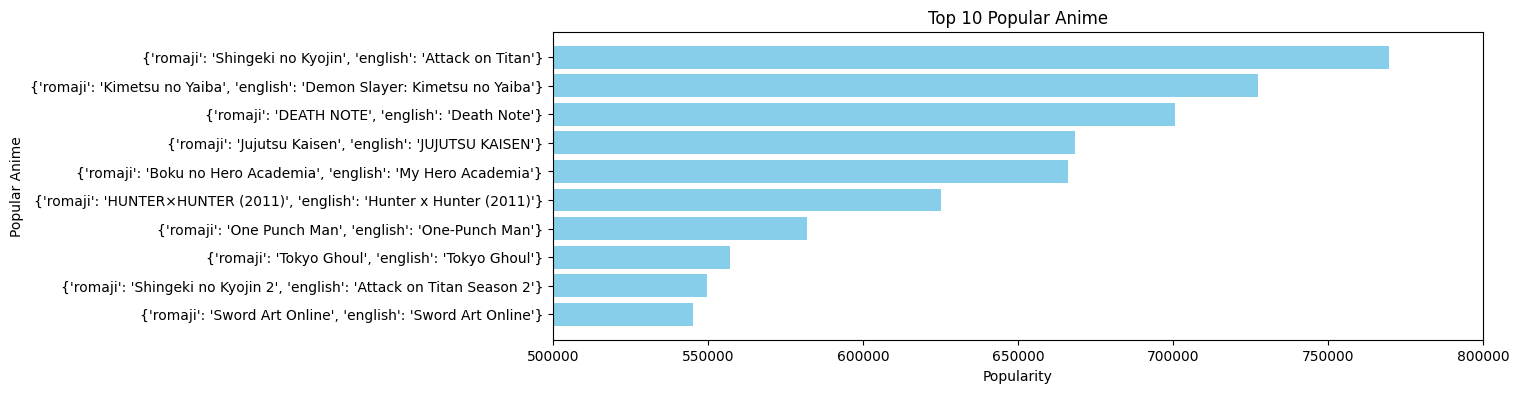

In [34]:
popular = fullDF[["title", "popularity"]] 
plt.figure(figsize=(12, 4))

plt.barh(popular['title'][:10], popular['popularity'][:10], color='skyblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(500000, 800000)
plt.xlabel('Popularity')
plt.ylabel('Popular Anime')
plt.title('Top 10 Popular Anime')

Text(0.5, 1.0, 'Top 10 Anime')

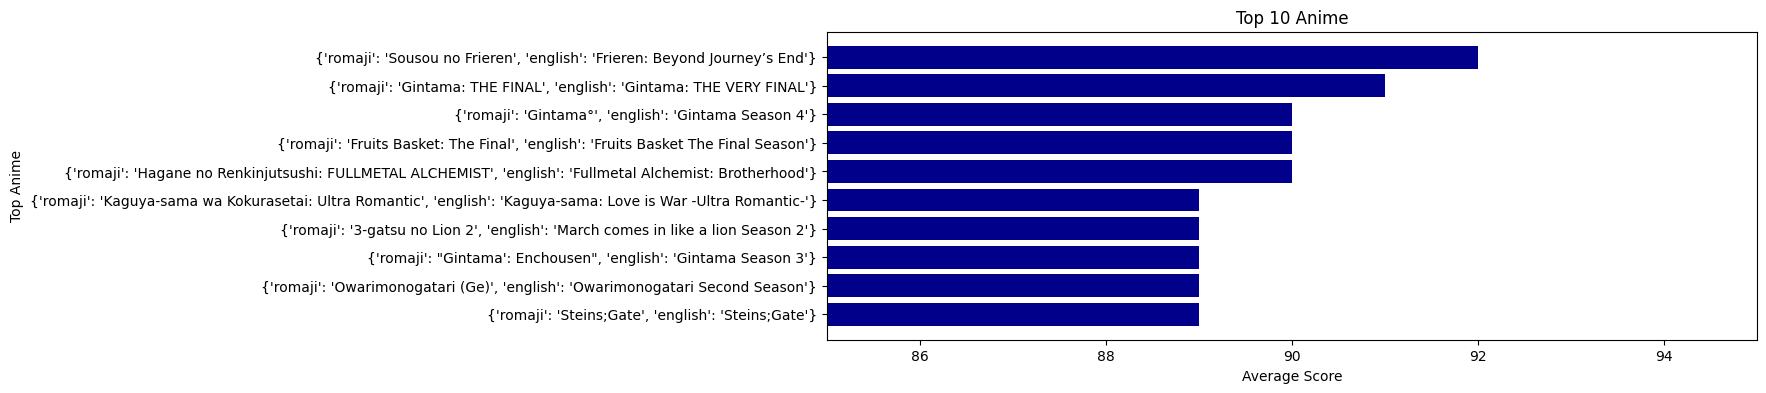

In [37]:
sortedDF = fullDF[["title", "averageScore", "favourites", "popularity"]]
sortedDF = sortedDF.sort_values(by='averageScore', ascending=False)
scores = sortedDF[["title", "averageScore"]]
plt.figure(figsize=(12, 4))

plt.barh(scores['title'][:10], scores['averageScore'][:10], color='darkblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(85, 95)
plt.xlabel('Average Score')
plt.ylabel('Top Anime')
plt.title('Top 10 Anime')

From the above graph we see that there are multiple anime with the same score. Also, Gintama has way too many highly rated seasons. Using the popularity and score alone for a recommendations can be a failure since the anime's above have really unrelated plots, well except maybe Gintama.

So let's try to see what I can do with the genres.</br>

This is what my plan is, convert the genres column into a bigger Genres column that has all the genres as smaller seperate columns. If the anime has that genre used in it, it would have a 1, else a 0. </br></br>

I can't comprehend where will I go with this tho? Like why would I do this? Would this really help?


In [39]:
df_change = fullDF['genres'].str.split(',').tolist()
#I have a list or lists.
#Each list of list contains a string
#The String has not only words but also other shit in it
#I want to remove the other shit
genreList = []
for i in range(len(df_change)):
    for j in range(len(df_change[i])):
         string = df_change[i][j]
         df_change[i][j]= ''.join(letter for letter in string if letter.isalnum())
         #adding into out genre list
         if df_change[i][j] not in genreList:
            genreList.append(df_change[i][j])
genreList.pop()
#lets create a dataframe
#genreDF = pd.DataFrame(df_change)
#print(genreDF.head())
print(genreList)
#genreList = df_change

['Action', 'Drama', 'Fantasy', 'Mystery', 'Adventure', 'Supernatural', 'Psychological', 'Thriller', 'Comedy', 'SciFi', 'Horror', 'Romance', 'SliceofLife', 'Music', 'Sports', 'Ecchi', 'Mecha', 'MahouShoujo', 'Hentai']


Listen to this!</br>
https://youtu.be/5YuQQwLGTxA?si=jqYBXglrvV5ABs87